<a href="https://colab.research.google.com/github/ericbonelli/Cientista-de-Dados_EBAC/blob/main/Profissao_Cientista_de_Dados_M11_assignment02.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

## Árvores de regressão - exercícios 02

Este exercício será uma continuação do anterior, mesma base, mesmas variáveis - vamos tentar buscar a 'melhor árvore'.


*Atenção - Utilizar a base de dados em anexo que é a mesma base que utilizamos na atividade anterior! A base Boston, assim como para a primeira atividade foi descontinuada e não deve ser utilizada*

In [37]:
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
import numpy as np


from sklearn import datasets
from sklearn.tree import DecisionTreeRegressor
from sklearn import tree
from sklearn.model_selection import train_test_split
from sklearn.metrics import mean_squared_error
from sklearn.metrics import r2_score

### 1. Execute os passos do exercício anterior, até que você tenha uma árvore de regressão predizendo o valor do imóvel na base de treinamento.

In [38]:
from google.colab import drive
drive.mount('/content/drive')

Drive already mounted at /content/drive; to attempt to forcibly remount, call drive.mount("/content/drive", force_remount=True).


In [39]:
data = pd.read_csv('//content/drive/MyDrive/Especialização em IA/Cientista de Dados - Ebac/Desenvolvimento de aplicações com Python/Árvores II (Parte I: árvore de regressão)/housing.csv')
data.head()

,longitude,latitude,housing_median_age,total_rooms,total_bedrooms,population,households,median_income,median_house_value,ocean_proximity
0,-122.23,37.88,41.0,880.0,129.0,322.0,126.0,8.3252,452600.0,NEAR BAY
1,-122.22,37.86,21.0,7099.0,1106.0,2401.0,1138.0,8.3014,358500.0,NEAR BAY
2,-122.24,37.85,52.0,1467.0,190.0,496.0,177.0,7.2574,352100.0,NEAR BAY
3,-122.25,37.85,52.0,1274.0,235.0,558.0,219.0,5.6431,341300.0,NEAR BAY
4,-122.25,37.85,52.0,1627.0,280.0,565.0,259.0,3.8462,342200.0,NEAR BAY


In [40]:
data.dtypes

,0
longitude,float64
latitude,float64
housing_median_age,float64
total_rooms,float64
total_bedrooms,float64
population,float64
households,float64
median_income,float64
median_house_value,float64
ocean_proximity,object


In [41]:
#Verificar dados faltantes e nulos
data.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 20640 entries, 0 to 20639
Data columns (total 10 columns):
 #   Column              Non-Null Count  Dtype  
---  ------              --------------  -----  
 0   longitude           20640 non-null  float64
 1   latitude            20640 non-null  float64
 2   housing_median_age  20640 non-null  float64
 3   total_rooms         20640 non-null  float64
 4   total_bedrooms      20433 non-null  float64
 5   population          20640 non-null  float64
 6   households          20640 non-null  float64
 7   median_income       20640 non-null  float64
 8   median_house_value  20640 non-null  float64
 9   ocean_proximity     20640 non-null  object 
dtypes: float64(9), object(1)
memory usage: 1.6+ MB


In [42]:
# eliminar as colunas com dados faltantes
data.dropna(inplace=True)
data.info()

<class 'pandas.core.frame.DataFrame'>
Index: 20433 entries, 0 to 20639
Data columns (total 10 columns):
 #   Column              Non-Null Count  Dtype  
---  ------              --------------  -----  
 0   longitude           20433 non-null  float64
 1   latitude            20433 non-null  float64
 2   housing_median_age  20433 non-null  float64
 3   total_rooms         20433 non-null  float64
 4   total_bedrooms      20433 non-null  float64
 5   population          20433 non-null  float64
 6   households          20433 non-null  float64
 7   median_income       20433 non-null  float64
 8   median_house_value  20433 non-null  float64
 9   ocean_proximity     20433 non-null  object 
dtypes: float64(9), object(1)
memory usage: 1.7+ MB


In [43]:
#Verificar dados duplicados
data.duplicated().sum()
print(f'A base possui {data.duplicated().sum()} dados duplicados')

A base possui 0 dados duplicados


In [44]:
# Análise descritiva das variáveis
data.describe()

,longitude,latitude,housing_median_age,total_rooms,total_bedrooms,population,households,median_income,median_house_value
count,20433.000000,20433.000000,20433.000000,20433.000000,20433.000000,20433.000000,20433.000000,20433.000000,20433.000000
mean,-119.570689,35.633221,28.633094,2636.504233,537.870553,1424.946949,499.433465,3.871162,206864.413155
std,2.003578,2.136348,12.591805,2185.269567,421.385070,1133.208490,382.299226,1.899291,115435.667099
min,-124.350000,32.540000,1.000000,2.000000,1.000000,3.000000,1.000000,0.499900,14999.000000
25%,-121.800000,33.930000,18.000000,1450.000000,296.000000,787.000000,280.000000,2.563700,119500.000000
50%,-118.490000,34.260000,29.000000,2127.000000,435.000000,1166.000000,409.000000,3.536500,179700.000000
75%,-118.010000,37.720000,37.000000,3143.000000,647.000000,1722.000000,604.000000,4.744000,264700.000000
max,-114.310000,41.950000,52.000000,39320.000000,6445.000000,35682.000000,6082.000000,15.000100,500001.000000


In [45]:
# Transformar a variável "ocean_proximity" em Dummmy
data = pd.get_dummies(data, columns=['ocean_proximity'], drop_first=True)
data.head()

,longitude,latitude,housing_median_age,total_rooms,total_bedrooms,population,households,median_income,median_house_value,ocean_proximity_INLAND,ocean_proximity_ISLAND,ocean_proximity_NEAR BAY,ocean_proximity_NEAR OCEAN
0,-122.23,37.88,41.0,880.0,129.0,322.0,126.0,8.3252,452600.0,False,False,True,False
1,-122.22,37.86,21.0,7099.0,1106.0,2401.0,1138.0,8.3014,358500.0,False,False,True,False
2,-122.24,37.85,52.0,1467.0,190.0,496.0,177.0,7.2574,352100.0,False,False,True,False
3,-122.25,37.85,52.0,1274.0,235.0,558.0,219.0,5.6431,341300.0,False,False,True,False
4,-122.25,37.85,52.0,1627.0,280.0,565.0,259.0,3.8462,342200.0,False,False,True,False


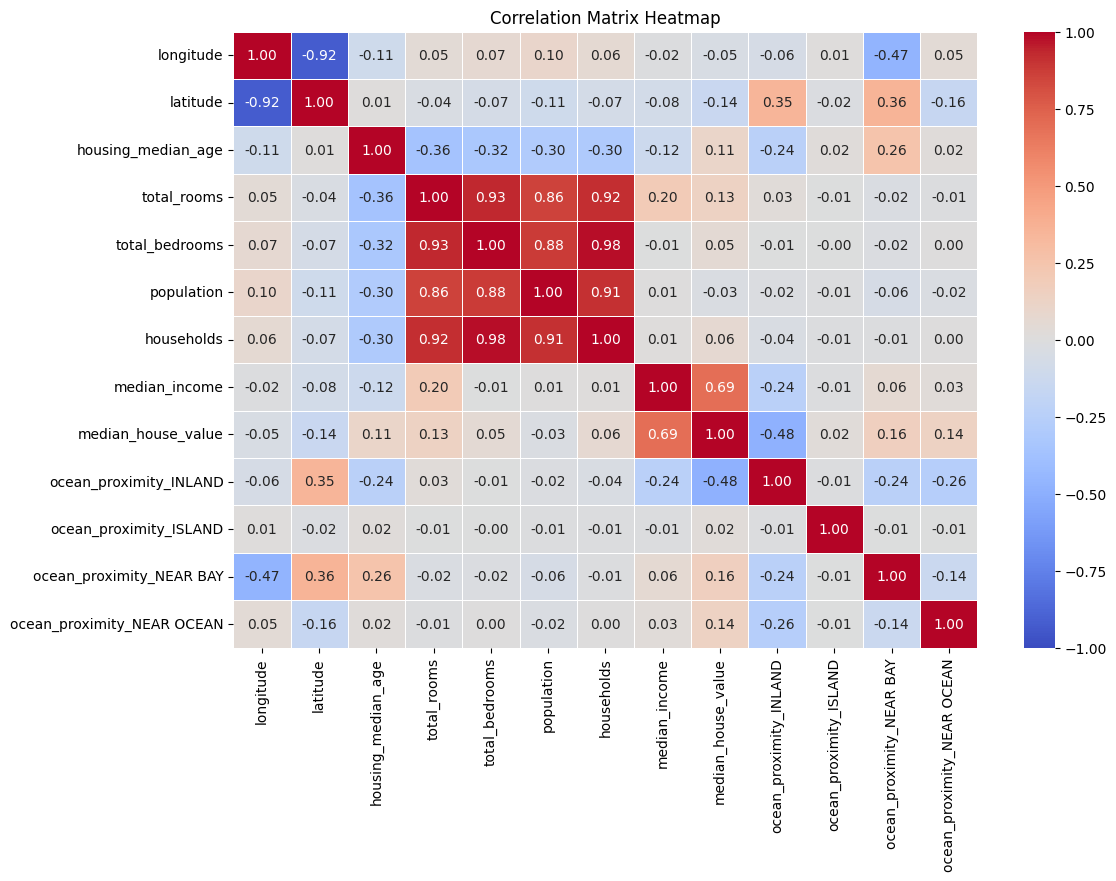

In [46]:
# Vizualizar a Matriz de correlação
correlation_matrix = data.corr()
plt.figure(figsize=(12, 8))
heatmap = sns.heatmap(
    correlation_matrix,
    annot=True,
    cmap='coolwarm',
    fmt='.2f',
    vmin=-1,
    vmax=1,
    linewidths=0.5
)
plt.title('Correlation Matrix Heatmap')
plt.show()

In [47]:
# Vizualizar dados com a variável dependente
target_correlation = correlation_matrix['median_house_value'].sort_values(ascending=False)
target_correlation

,median_house_value
median_house_value,1.000000
median_income,0.688355
ocean_proximity_NEAR BAY,0.160526
ocean_proximity_NEAR OCEAN,0.140378
total_rooms,0.133294
housing_median_age,0.106432
households,0.064894
total_bedrooms,0.049686
ocean_proximity_ISLAND,0.023525
population,-0.025300


In [48]:
# Dataframe apenas com as variáveis com corralação acima de 0,1
data_select_corr = data[['median_house_value', 'median_income', 'ocean_proximity_NEAR BAY', 'ocean_proximity_NEAR OCEAN', 'total_rooms', 'ocean_proximity_INLAND']] # Use square brackets to select columns
data_select_corr.head()

,median_house_value,median_income,ocean_proximity_NEAR BAY,ocean_proximity_NEAR OCEAN,total_rooms,ocean_proximity_INLAND
0,452600.0,8.3252,True,False,880.0,False
1,358500.0,8.3014,True,False,7099.0,False
2,352100.0,7.2574,True,False,1467.0,False
3,341300.0,5.6431,True,False,1274.0,False
4,342200.0,3.8462,True,False,1627.0,False


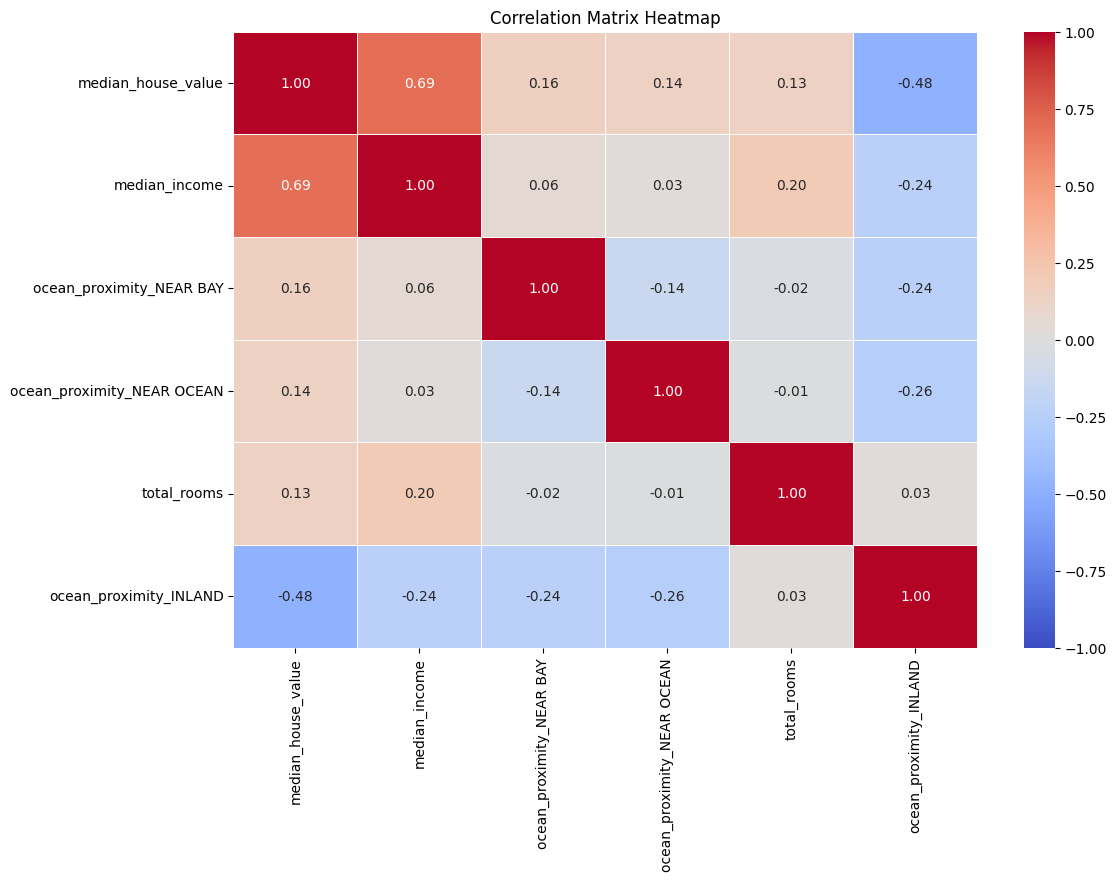

In [49]:
# Vizualizar a Matriz de correlação com as variáveis selecionadas
correlation_matrix = data_select_corr.corr()
plt.figure(figsize=(12, 8))
heatmap = sns.heatmap(
    correlation_matrix,
    annot=True,
    cmap='coolwarm',
    fmt='.2f',
    vmin=-1,
    vmax=1,
    linewidths=0.5
)
plt.title('Correlation Matrix Heatmap')
plt.show()

In [50]:
# Separe os dados em validação e teste
X = data_select_corr.drop('median_house_value', axis=1)
y = data_select_corr['median_house_value']
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)
X_train.shape, X_test.shape, y_train.shape, y_test.shape

((16346, 5), (4087, 5), (16346,), (4087,))

In [51]:
# treinar a arvore
regr_2 = DecisionTreeRegressor(random_state=42, max_depth=8)
regr_2.fit(X_train, y_train)

DecisionTreeRegressor(max_depth=8, random_state=42)

In [52]:
print(f"Profundiade: {regr_2.tree_.max_depth}")
print(f"R² da árvore final: {regr_2.score(X_test, y_test):.2f}")
print(f"MSE da árvore final: {mean_squared_error(y_test, regr_2.predict(X_test)):.2f}")

Profundiade: 8
R² da árvore final: 0.57
MSE da árvore final: 5854207787.88


### 2.  Calcule o caminho indicado pelos CCP-alfas dessa árvore.

In [53]:
path = regr_2.cost_complexity_pruning_path(X_train, y_train)
path

{'ccp_alphas': array([0.00000000e+00, 5.65581794e+02, 1.06965007e+04, 1.46466006e+04,
        1.91178270e+04, 2.14807904e+04, 2.84549737e+04, 3.90677638e+04,
        4.22846268e+04, 4.81457115e+04, 5.40380929e+04, 7.57620621e+04,
        7.96576125e+04, 9.51280640e+04, 1.00065306e+05, 1.59332896e+05,
        1.72060443e+05, 1.74928484e+05, 1.78196909e+05, 1.78579229e+05,
        1.98472708e+05, 2.12994820e+05, 2.21548304e+05, 2.27815618e+05,
        2.86626738e+05, 2.88348987e+05, 3.26251398e+05, 3.28652382e+05,
        3.56935277e+05, 3.61262898e+05, 3.73634069e+05, 4.31709287e+05,
        4.48142168e+05, 4.52653962e+05, 5.10985157e+05, 5.16181329e+05,
        5.27015452e+05, 5.50763786e+05, 5.73278172e+05, 5.76238924e+05,
        5.84725531e+05, 5.99282416e+05, 6.17751514e+05, 6.25324772e+05,
        6.60224713e+05, 6.90280843e+05, 7.43851809e+05, 7.58870493e+05,
        8.26278431e+05, 8.32943286e+05, 8.53896876e+05, 8.58583749e+05,
        8.70662907e+05, 8.74590837e+05, 8.76944013

Text(0, 0.5, 'Impureza total das folhas')

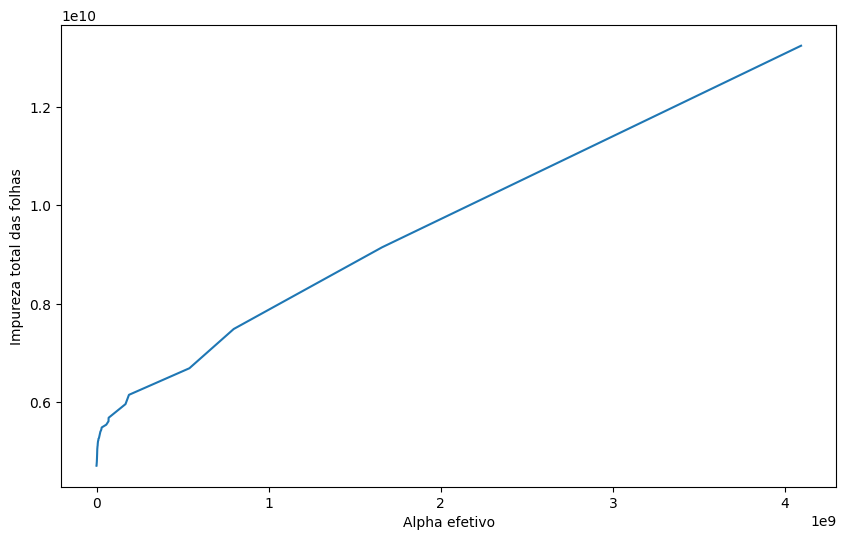

In [54]:
# A imprueza da arvore em função do alpha
ccp_alphas, impurities = path.ccp_alphas, path.impurities

plt.figure(figsize=(10, 6))
plt.plot(ccp_alphas, impurities)
plt.xlabel("Alpha efetivo")
plt.ylabel("Impureza total das folhas")

### 3. Paca cada valor de alpha obtido no item 2, treine uma árvore com o respectivo alfa, e guarde essa árvore em uma lista.

In [55]:
clfs = []

for ccp_alpha in ccp_alphas:
    clf = DecisionTreeRegressor(random_state=42, ccp_alpha=ccp_alpha)
    clf.fit(X_train, y_train)
    clfs.append(clf)

Text(0, 0.5, 'Profundidade da árvore')

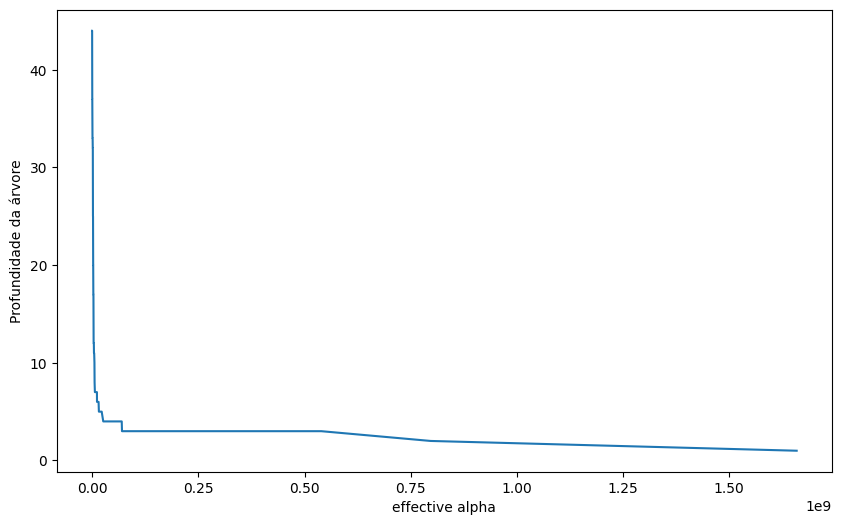

In [56]:
tree_depths = [clf.tree_.max_depth for clf in clfs]
plt.figure(figsize=(10,  6))
plt.plot(ccp_alphas[:-1], tree_depths[:-1])
plt.xlabel("effective alpha")
plt.ylabel("Profundidade da árvore")

### 4. Para cada árvore na lista, calcule o MSE da árvore.

In [57]:
train_scores = [mean_squared_error(y_train , clf.predict(X_train)) for clf in clfs]
test_scores  = [mean_squared_error(y_test  , clf.predict(X_test )) for clf in clfs]

### 5. Monte um gráfico do MSE pelo alpha, escolha um valor de alpha perto do ponto de mínimo do MSE

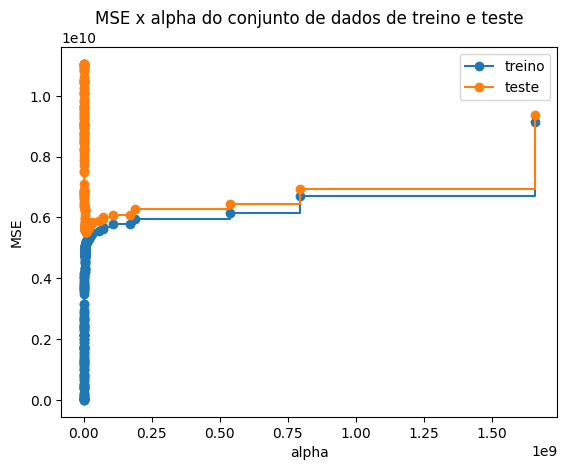

In [58]:
fig, ax = plt.subplots()
ax.set_xlabel("alpha")
ax.set_ylabel("MSE")
ax.set_title("MSE x alpha do conjunto de dados de treino e teste")
ax.plot(ccp_alphas[:-1], train_scores[:-1], marker='o', label="treino",
        drawstyle="steps-post")
ax.plot(ccp_alphas[:-1], test_scores[:-1], marker='o', label="teste",
        drawstyle="steps-post")
ax.legend()
plt.show()

### 6. Calcule o R-quadrado dessa árvore encontrada no item acima

In [59]:
optimal_alpha = ccp_alphas[test_scores.index(min(test_scores))]
optimal_alpha

6811512.941383611

In [63]:
arvore_final = DecisionTreeRegressor(ccp_alpha=optimal_alpha)
arvore_final.fit(X_train, y_train)

print(f"Profundiade: {arvore_final.tree_.max_depth}")
print(f"R² da árvore final: {arvore_final.score(X_test, y_test):.2f}")
print(f"MSE da árvore final: {mean_squared_error(y_test, arvore_final.predict(X_test)):.2f}")

Profundiade: 7
R² da árvore final: 0.60
MSE da árvore final: 5505665632.26


Houve uma melhora no R2 e MSE da arvore pós poda.

### 7. Visualize esta árvore.

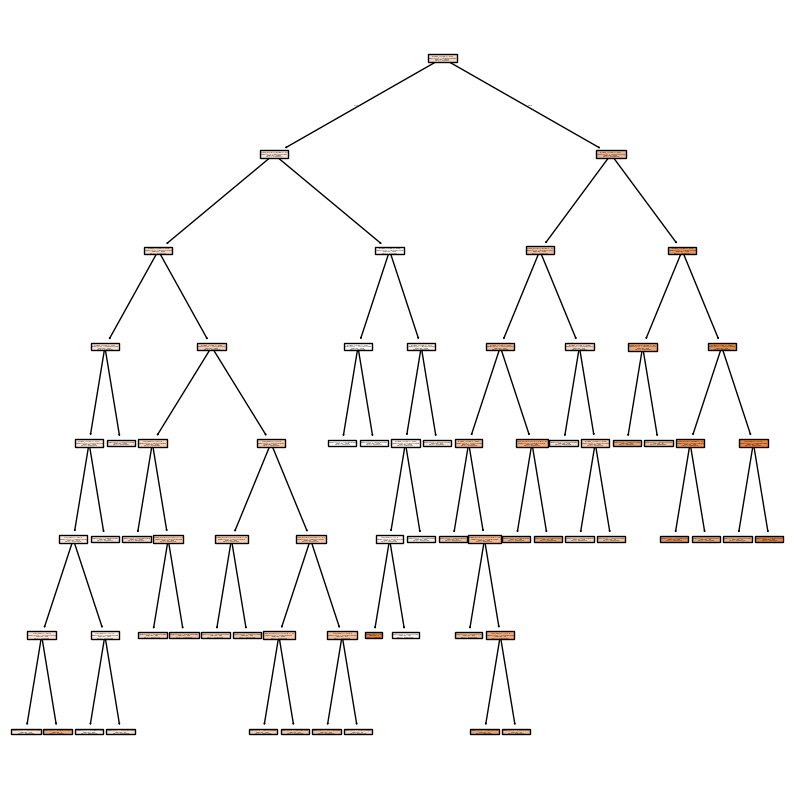

In [64]:
plt.rc('figure', figsize=(10, 10))
tp = tree.plot_tree(arvore_final,
                    feature_names=X.columns,
                    filled=True)